# Actividad 04 - ADALINE Regresión Lineal

**Centro Universitario de Ciencias Exactas e Ingenierías**\
**Materia** Inteligencia artificial 2\
**Nombre:** Mejia Blanco Erick\
**Código:** 211408613

### Instrucciones:

Codifica el algoritmo del ADALINE con función de activación lineal

1. Lee los datos del archivo "**DataSet1.csv**" , donde la primera columna son los datos en x y la segunda columna los datos en y.
2. Entrena la neurona artificial usando cualquiera de los algoritmos vistos en clase
3. Reporta tu código
4. Elabora una gráfica con los puntos y la línea de regresión encontrada.

In [1]:
%matplotlib inline
import csv
import numpy as np
import matplotlib.pyplot as plt

**Stochastic Gradient Descent**

In [2]:
def adaline(x, y, w, b, eta, epochs, dimentions, samples):
    iters = 0
    y_hat = 0
    while iters < epochs:
        for i in range(samples):
            y_hat = (w.conj().T * x[i] + b).sum()
            w = w + (eta * (y[i] - y_hat)) * x[i]
            b = b + eta * (y[i] - y_hat)
        iters += 1
    return (w, b)

In [3]:
def scale(vector):
    return np.array([(x_i - np.mean(x_i))/np.std(x) for x_i in x])

In [4]:
"""
# Way number one to charge data from a csv
lines = None
with open('DataSet1.csv') as f:
    lines = list(csv.reader(f, delimiter=','))
data = np.array(lines, dtype=np.float).T
data
"""
# Way number two to charge data from a csv
data = np.genfromtxt('DataSet1.csv', delimiter=',', dtype=np.float)
data

array([[0.82202  , 0.1675   ],
       [0.95587  , 0.0091221],
       [0.87913  , 0.15943  ],
       [0.38489  , 0.55851  ],
       [0.94356  , 0.040785 ],
       [0.42927  , 0.60479  ],
       [0.1471   , 0.84797  ],
       [0.29858  , 0.67316  ],
       [0.68043  , 0.29689  ],
       [0.94057  , 0.070909 ],
       [0.95428  , 0.075731 ],
       [0.59607  , 0.42001  ],
       [0.95581  , 0.10373  ],
       [0.39546  , 0.55537  ],
       [0.022153 , 0.95033  ],
       [0.28213  , 0.63034  ],
       [0.012802 , 0.98033  ],
       [0.86905  , 0.15324  ],
       [0.4248   , 0.56525  ],
       [0.075402 , 0.84485  ],
       [0.12166  , 0.78626  ],
       [0.22881  , 0.81876  ],
       [0.2093   , 0.72919  ],
       [0.87237  , 0.15714  ],
       [0.76586  , 0.22224  ],
       [0.33447  , 0.64804  ],
       [0.37568  , 0.58886  ],
       [0.59173  , 0.41899  ],
       [0.53029  , 0.45347  ],
       [0.32299  , 0.62423  ],
       [0.85894  , 0.12609  ],
       [0.25315  , 0.72985  ],
       [

In [5]:
samples,dim = data.shape
dim = 1
print(samples, dim)

100 1


In [6]:
x = data[:, 0]
x

array([0.82202  , 0.95587  , 0.87913  , 0.38489  , 0.94356  , 0.42927  ,
       0.1471   , 0.29858  , 0.68043  , 0.94057  , 0.95428  , 0.59607  ,
       0.95581  , 0.39546  , 0.022153 , 0.28213  , 0.012802 , 0.86905  ,
       0.4248   , 0.075402 , 0.12166  , 0.22881  , 0.2093   , 0.87237  ,
       0.76586  , 0.33447  , 0.37568  , 0.59173  , 0.53029  , 0.32299  ,
       0.85894  , 0.25315  , 0.94045  , 0.38087  , 0.68244  , 0.26278  ,
       0.0087067, 0.94731  , 0.52911  , 0.67021  , 0.60476  , 0.75218  ,
       0.98918  , 0.72832  , 0.86165  , 1.       , 0.76101  , 0.13015  ,
       0.31554  , 0.0095586, 0.69425  , 0.96597  , 0.72973  , 0.73766  ,
       0.15953  , 0.34547  , 0.57094  , 0.45298  , 0.83739  , 0.81859  ,
       0.31312  , 0.45477  , 0.67308  , 0.59211  , 0.11816  , 0.       ,
       0.10862  , 0.20958  , 0.44186  , 0.52968  , 0.99851  , 0.7177   ,
       0.98788  , 0.03522  , 0.63494  , 0.96764  , 0.25755  , 0.95636  ,
       0.90784  , 0.18014  , 0.73478  , 0.15979  , 

In [7]:
y = data[:, 1]
y

array([0.1675   , 0.0091221, 0.15943  , 0.55851  , 0.040785 , 0.60479  ,
       0.84797  , 0.67316  , 0.29689  , 0.070909 , 0.075731 , 0.42001  ,
       0.10373  , 0.55537  , 0.95033  , 0.63034  , 0.98033  , 0.15324  ,
       0.56525  , 0.84485  , 0.78626  , 0.81876  , 0.72919  , 0.15714  ,
       0.22224  , 0.64804  , 0.58886  , 0.41899  , 0.45347  , 0.62423  ,
       0.12609  , 0.72985  , 0.052637 , 0.62111  , 0.32423  , 0.63203  ,
       0.94196  , 0.046564 , 0.47697  , 0.34624  , 0.4052   , 0.22825  ,
       0.060676 , 0.23644  , 0.082418 , 0.014058 , 0.2672   , 0.88528  ,
       0.68785  , 1.       , 0.30404  , 0.087746 , 0.31158  , 0.25921  ,
       0.84985  , 0.67934  , 0.47231  , 0.53007  , 0.20279  , 0.21538  ,
       0.70625  , 0.57549  , 0.31539  , 0.42042  , 0.90129  , 0.96275  ,
       0.82668  , 0.79645  , 0.55275  , 0.47555  , 0.       , 0.24552  ,
       0.027957 , 0.97693  , 0.36687  , 0.023135 , 0.72471  , 0.033671 ,
       0.04037  , 0.81135  , 0.29635  , 0.82397  , 

In [8]:
w = -1 + 2 * np.random.rand(dim, 1)
w

array([[-0.09772659]])

In [9]:
b = -1 + 2 * np.random.rand()
b

0.5333598695568598

In [10]:
eta = .5
eta

0.5

In [11]:
scale(x)
x

array([0.82202  , 0.95587  , 0.87913  , 0.38489  , 0.94356  , 0.42927  ,
       0.1471   , 0.29858  , 0.68043  , 0.94057  , 0.95428  , 0.59607  ,
       0.95581  , 0.39546  , 0.022153 , 0.28213  , 0.012802 , 0.86905  ,
       0.4248   , 0.075402 , 0.12166  , 0.22881  , 0.2093   , 0.87237  ,
       0.76586  , 0.33447  , 0.37568  , 0.59173  , 0.53029  , 0.32299  ,
       0.85894  , 0.25315  , 0.94045  , 0.38087  , 0.68244  , 0.26278  ,
       0.0087067, 0.94731  , 0.52911  , 0.67021  , 0.60476  , 0.75218  ,
       0.98918  , 0.72832  , 0.86165  , 1.       , 0.76101  , 0.13015  ,
       0.31554  , 0.0095586, 0.69425  , 0.96597  , 0.72973  , 0.73766  ,
       0.15953  , 0.34547  , 0.57094  , 0.45298  , 0.83739  , 0.81859  ,
       0.31312  , 0.45477  , 0.67308  , 0.59211  , 0.11816  , 0.       ,
       0.10862  , 0.20958  , 0.44186  , 0.52968  , 0.99851  , 0.7177   ,
       0.98788  , 0.03522  , 0.63494  , 0.96764  , 0.25755  , 0.95636  ,
       0.90784  , 0.18014  , 0.73478  , 0.15979  , 

### Version sin ruido

**Data To Classify**

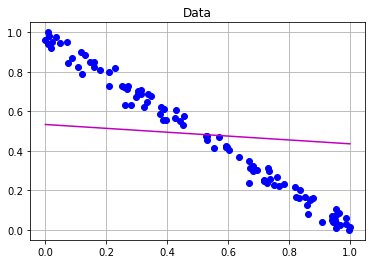

In [12]:
plt.title('Data')
plt.grid(True)
plt.plot(x, y, 'ob')
plt.plot([0, 1], [w[0].conj().T * 0 + b, w[0].conj().T * 1 + b], '-m')
plt.show()

In [13]:
w_res, b_res = adaline(x=x, y=y, w=w, b=b, eta=eta, epochs=100, dimentions=dim, samples=samples)

In [14]:
w_res

array([[-0.95880842]])

In [15]:
b_res

0.9816051347292281

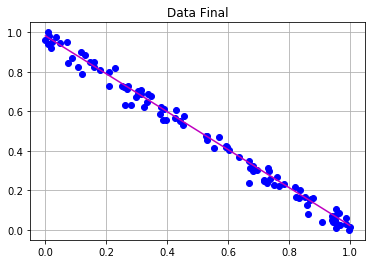

In [16]:
plt.title('Data Final')
plt.grid(True)
plt.plot(x, y, 'ob')
plt.plot([0, 1], [w_res[0].conj().T * 0 + b_res, w_res[0].conj().T * 1 + b_res], '-m')
plt.show()

### Version con ruido

In [17]:
max_pendiente = 1
min_pendiente = 0

In [18]:
max_ordenada = 1
min_ordenada = 0

In [19]:
noise = .25

In [20]:
pendiente = - min_pendiente + (max_pendiente - min_pendiente) * np.random.rand(1)
pendiente

array([0.5043526])

In [21]:
ordenada = - min_ordenada + (max_ordenada - min_ordenada) * np.random.rand(1)
ordenada

array([0.94211831])

In [22]:
y = pendiente * x + ordenada
y

array([1.35670624, 1.42421383, 1.38550981, 1.13623858, 1.41800525,
       1.15862175, 1.01630858, 1.09270791, 1.28529495, 1.41649724,
       1.42341191, 1.24274776, 1.42418357, 1.14156959, 0.95329123,
       1.08441131, 0.94857503, 1.38042594, 1.15636729, 0.9801475 ,
       1.00347785, 1.05751923, 1.04767931, 1.38210039, 1.32838179,
       1.11080912, 1.13159349, 1.24055887, 1.20957145, 1.10501916,
       1.37532693, 1.06979517, 1.41643671, 1.13421108, 1.2863087 ,
       1.07465209, 0.94650955, 1.41989657, 1.20897631, 1.28014047,
       1.24713059, 1.32148225, 1.44101382, 1.3094484 , 1.37669373,
       1.44647091, 1.32593568, 1.0077598 , 1.10126173, 0.94693921,
       1.2922651 , 1.42930779, 1.31015953, 1.31415905, 1.02257768,
       1.116357  , 1.23007338, 1.17057995, 1.36445814, 1.35497631,
       1.1000412 , 1.17148274, 1.28158796, 1.24075053, 1.00171261,
       0.94211831, 0.99690109, 1.04782053, 1.16497155, 1.2092638 ,
       1.44571943, 1.30409217, 1.44035816, 0.95988161, 1.26235

In [23]:
y = y + noise * np.random.rand(samples, dim)[0]
y

array([1.36554418, 1.43305178, 1.39434776, 1.14507653, 1.4268432 ,
       1.1674597 , 1.02514652, 1.10154585, 1.2941329 , 1.42533518,
       1.43224986, 1.25158571, 1.43302152, 1.15040753, 0.96212918,
       1.09324925, 0.95741298, 1.38926388, 1.16520524, 0.98898545,
       1.01231579, 1.06635717, 1.05651725, 1.39093834, 1.33721974,
       1.11964707, 1.14043144, 1.24939682, 1.2184094 , 1.1138571 ,
       1.38416488, 1.07863312, 1.42527466, 1.14304903, 1.29514665,
       1.08349003, 0.9553475 , 1.42873452, 1.21781426, 1.28897841,
       1.25596853, 1.3303202 , 1.44985176, 1.31828634, 1.38553168,
       1.45530886, 1.33477363, 1.01659775, 1.11009967, 0.95577716,
       1.30110305, 1.43814574, 1.31899748, 1.322997  , 1.03141562,
       1.12519495, 1.23891133, 1.1794179 , 1.37329608, 1.36381425,
       1.10887914, 1.18032069, 1.2904259 , 1.24958847, 1.01055056,
       0.95095625, 1.00573903, 1.05665847, 1.1738095 , 1.21810174,
       1.45455737, 1.31293012, 1.4491961 , 0.96871955, 1.27118

In [24]:
w = -1 + 2 * np.random.rand(dim, 1)
w

array([[0.03852224]])

In [25]:
b = -1 + 2 * np.random.rand()
b

-0.9965792723963813

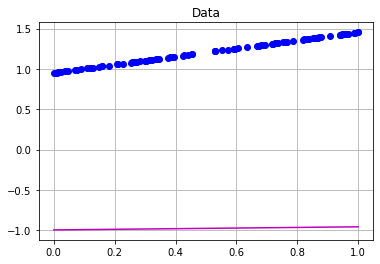

In [26]:
plt.title('Data')
plt.grid(True)
plt.plot(x, y, 'ob')
plt.plot([0, 1], [w[0].conj().T * 0 + b, w[0].conj().T * 1 + b], '-m')
plt.show()

In [27]:
w_res, b_res = adaline(x=x, y=y, w=w, b=b, eta=eta, epochs=100, dimentions=dim, samples=samples)

In [28]:
w_res

array([[0.5043526]])

In [29]:
b_res

0.9509562537976778

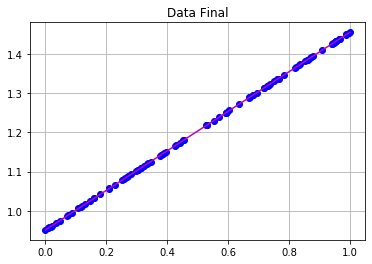

In [30]:
plt.title('Data Final')
plt.grid(True)
plt.plot(x, y, 'ob')
plt.plot([0, 1], [w_res[0].conj().T * 0 + b_res, w_res[0].conj().T * 1 + b_res], '-m')
plt.show()